In [81]:
from tkinter import Label

import pandas as pd
import numpy as np
from prompt_toolkit.key_binding.bindings.scroll import scroll_one_line_down
from sklearn.metrics import accuracy_score


In [82]:
df = pd.read_csv(r'C:\Users\Asus\User_follow_back\pythonProject1\Instagram_dataset')

In [83]:
df.head()

,User_ID,Follower_Count,Following_Count,Posts_Count,Engagement_Rate,Account_Type,Interaction_Frequency,Follow_Back
0,1,14706,2687,414,0.944878,0,30,0
1,2,6864,2452,122,1.026245,0,67,1
2,3,17627,2417,346,0.929118,0,81,0
3,4,50000,20155,1232,0.847214,0,67,0
4,5,6118,550,112,1.004083,0,63,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User_ID                100000 non-null  int64  
 1   Follower_Count         100000 non-null  int64  
 2   Following_Count        100000 non-null  int64  
 3   Posts_Count            100000 non-null  int64  
 4   Engagement_Rate        100000 non-null  float64
 5   Account_Type           100000 non-null  int64  
 6   Interaction_Frequency  100000 non-null  int64  
 7   Follow_Back            100000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 6.1 MB


In [85]:
df.describe()

,User_ID,Follower_Count,Following_Count,Posts_Count,Engagement_Rate,Account_Type,Interaction_Frequency,Follow_Back
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,13652.945110,3760.956470,272.452210,0.932224,0.298030,51.225200,0.350290
std,28867.657797,14049.690632,4618.953634,302.610081,0.177355,0.457395,26.500015,0.477063
min,1.000000,50.000000,5.000000,5.000000,0.581888,0.000000,6.000000,0.000000
25%,25000.750000,3606.000000,791.000000,67.000000,0.814451,0.000000,29.000000,0.000000
50%,50000.500000,8128.500000,1958.000000,155.000000,0.938488,0.000000,49.000000,0.000000
75%,75000.250000,18256.250000,4760.000000,358.000000,1.048328,1.000000,70.000000,1.000000
max,100000.000000,50000.000000,24995.000000,1499.000000,2.047332,1.000000,181.000000,1.000000


In [86]:
df.isnull().sum()

User_ID                  0
Follower_Count           0
Following_Count          0
Posts_Count              0
Engagement_Rate          0
Account_Type             0
Interaction_Frequency    0
Follow_Back              0
dtype: int64

In [87]:
df.shape

(100000, 8)

In [88]:
# pip install matplotlib

In [89]:
# pip install seaborn

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

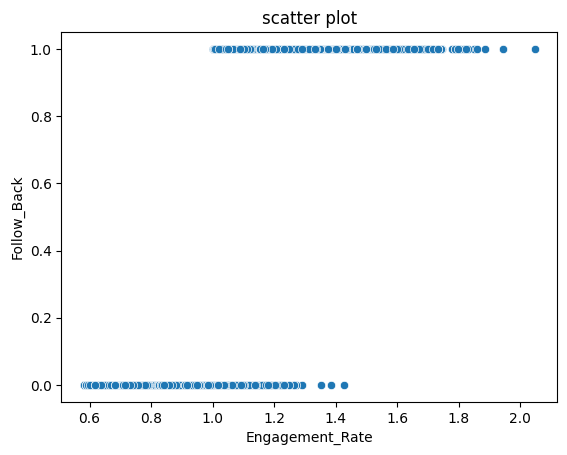

In [91]:
sns.scatterplot(x='Engagement_Rate',y='Follow_Back',data = df)
plt.title('scatter plot')
plt.show()

<Axes: xlabel='Follow_Back', ylabel='count'>

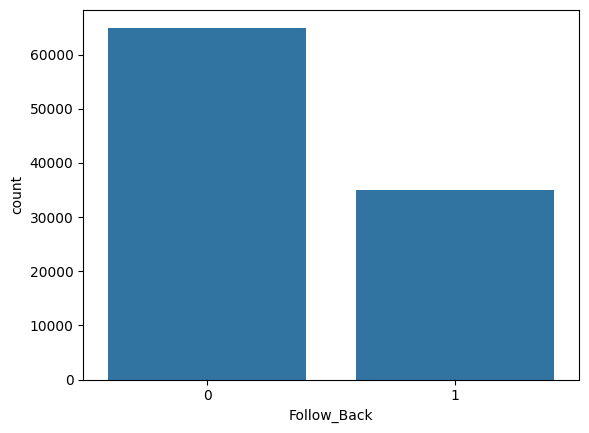

In [92]:
sns.countplot(x='Follow_Back',data=df)

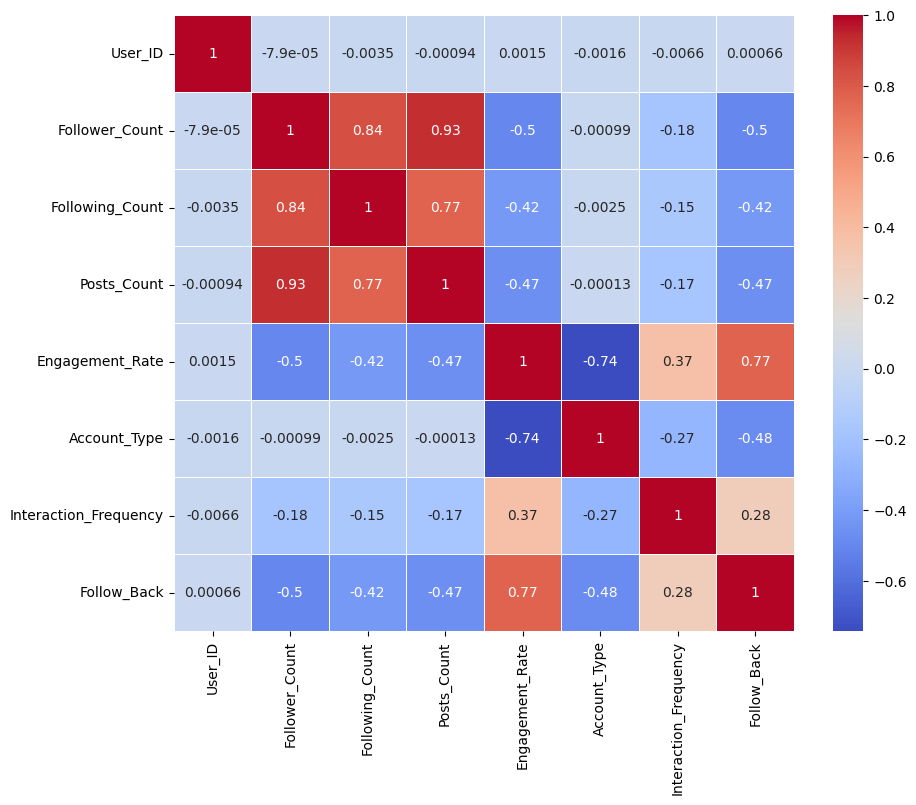

In [93]:
corr_matrx = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrx,annot = True, cmap= 'coolwarm',linewidths=0.5)
plt.show()

In [94]:
df1 = df.drop(['User_ID'],axis = 1)

In [95]:
df1.head()

,Follower_Count,Following_Count,Posts_Count,Engagement_Rate,Account_Type,Interaction_Frequency,Follow_Back
0,14706,2687,414,0.944878,0,30,0
1,6864,2452,122,1.026245,0,67,1
2,17627,2417,346,0.929118,0,81,0
3,50000,20155,1232,0.847214,0,67,0
4,6118,550,112,1.004083,0,63,1


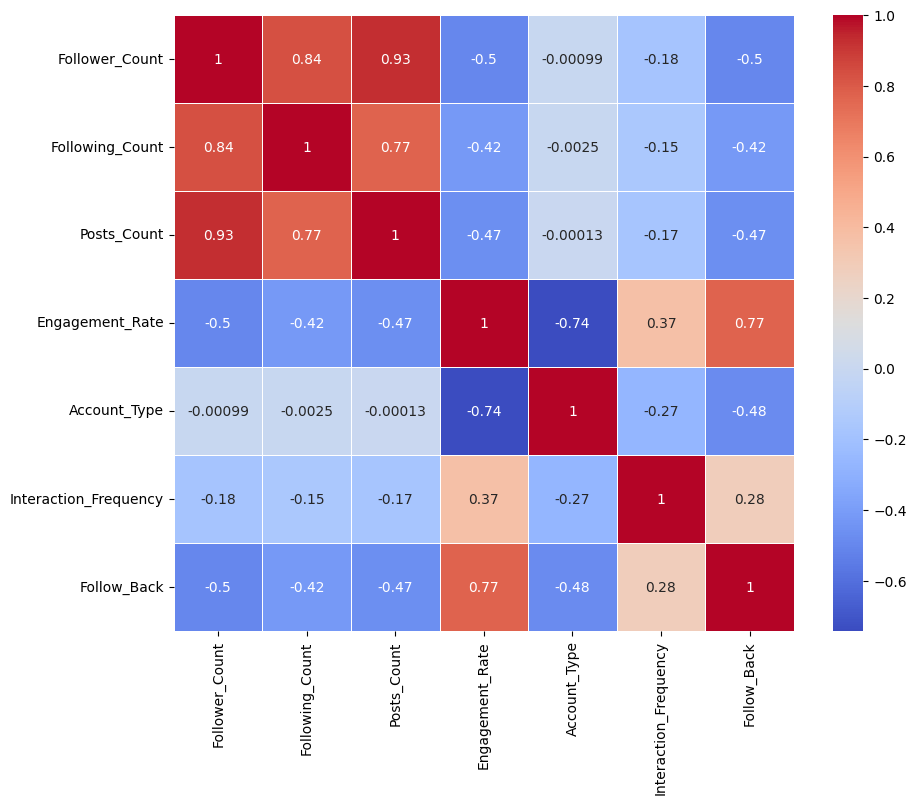

In [96]:
corr1 = df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr1,annot=True , cmap='coolwarm',linewidths=0.5)
plt.show()

In [97]:
df1.nunique()

Follower_Count            30117
Following_Count           16356
Posts_Count                1495
Engagement_Rate          100000
Account_Type                  2
Interaction_Frequency       157
Follow_Back                   2
dtype: int64

In [102]:
# pip install -U scikit-learn

# Encoding

## First using tree-based model (xgboost,random forest,etc..) 
### For this will be using label encoding .
### As for tree based model handle numeric features well, since Account_type is binary , label encoding will work efficiently


In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
le  =  LabelEncoder()
df1['Account_Type']= le.fit_transform(df1['Account_Type'])

In [109]:
df1.head()

,Follower_Count,Following_Count,Posts_Count,Engagement_Rate,Account_Type,Interaction_Frequency,Follow_Back
0,14706,2687,414,0.944878,0,30,0
1,6864,2452,122,1.026245,0,67,1
2,17627,2417,346,0.929118,0,81,0
3,50000,20155,1232,0.847214,0,67,0
4,6118,550,112,1.004083,0,63,1


In [111]:
df1.describe()

,Follower_Count,Following_Count,Posts_Count,Engagement_Rate,Account_Type,Interaction_Frequency,Follow_Back
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,13652.945110,3760.956470,272.452210,0.932224,0.298030,51.225200,0.350290
std,14049.690632,4618.953634,302.610081,0.177355,0.457395,26.500015,0.477063
min,50.000000,5.000000,5.000000,0.581888,0.000000,6.000000,0.000000
25%,3606.000000,791.000000,67.000000,0.814451,0.000000,29.000000,0.000000
50%,8128.500000,1958.000000,155.000000,0.938488,0.000000,49.000000,0.000000
75%,18256.250000,4760.000000,358.000000,1.048328,1.000000,70.000000,1.000000
max,50000.000000,24995.000000,1499.000000,2.047332,1.000000,181.000000,1.000000


## Lets do feature scaling on the data

(array([[ 34358.,  22579.,  12735.,   7597.,   5224.,   3624.,   2695.,
           1986.,   1518.,   7684.],
        [ 76186.,  13998.,   5336.,   2760.,   1720.,      0.,      0.,
              0.,      0.,      0.],
        [100000.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.],
        [100000.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.],
        [100000.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.],
        [100000.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.],
        [100000.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.]]),
 array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000., 50000.]),
 <a list of 7 BarContainer objects>)

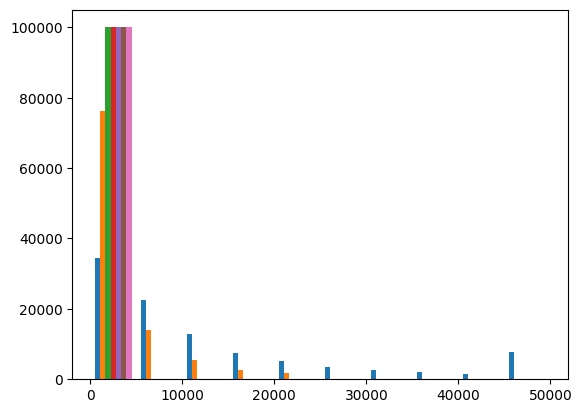

In [113]:
plt.hist(df1)

## As data do not follow gaussian distribution we can use normalization(min-max)

In [120]:
df1.describe()

,Follower_Count,Following_Count,Posts_Count,Engagement_Rate,Account_Type,Interaction_Frequency,Follow_Back
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,13652.945110,3760.956470,272.452210,0.932224,0.298030,51.225200,0.350290
std,14049.690632,4618.953634,302.610081,0.177355,0.457395,26.500015,0.477063
min,50.000000,5.000000,5.000000,0.581888,0.000000,6.000000,0.000000
25%,3606.000000,791.000000,67.000000,0.814451,0.000000,29.000000,0.000000
50%,8128.500000,1958.000000,155.000000,0.938488,0.000000,49.000000,0.000000
75%,18256.250000,4760.000000,358.000000,1.048328,1.000000,70.000000,1.000000
max,50000.000000,24995.000000,1499.000000,2.047332,1.000000,181.000000,1.000000


In [124]:
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(df):
    df_scale= df.copy()
    scaler = MinMaxScaler()
    col_to_scale=[]
    for col in df.columns:
        if df[col].max()>1:
            col_to_scale.append(col)
    df_scale[col_to_scale] = scaler.fit_transform(df_scale[col_to_scale])
    
    return df_scale
            
df_scaled = feature_scaling(df1)
    

In [125]:
df_scaled.describe()

,Follower_Count,Following_Count,Posts_Count,Engagement_Rate,Account_Type,Interaction_Frequency,Follow_Back
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.272331,0.150298,0.179018,0.239065,0.298030,0.258430,0.350290
std,0.281275,0.184832,0.202550,0.121024,0.457395,0.151429,0.477063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.071191,0.031453,0.041499,0.158698,0.000000,0.131429,0.000000
50%,0.161732,0.078151,0.100402,0.243339,0.000000,0.245714,0.000000
75%,0.364489,0.190276,0.236278,0.318292,1.000000,0.365714,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Follow_Back',axis=1)
y = df['Follow_Back']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2, random_state=42)

In [127]:
# pip install xgboost   

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.2 MB/s eta 0:00:58
   ---------------------------------------- 0.4/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.0/124.9 MB 7.2 MB/s eta 0:00:18
    --------------------------------------- 1.7/124.9 MB 9.0 MB/s eta 0:00:14
    --------------------------------------- 2.8/124.9 MB 13.0 MB/s eta 0:00:10
   - -------------------------------------- 3.9/124.9 MB 14.7 MB/s eta 0:00:09
   - -------------------------------------- 5.4/124.9 MB 16.4 MB/s eta 0:00:08
   - -------------------------------------- 5.4/124.9 MB 16.4 MB/s eta 0:00:08
   - -------------------------------------- 5.4/124.9 MB 16.4 MB/s eta 0:00:08
   - ------------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(user_label_encoder = False, eval_metric = 'logloss')
model.fit(X_train,y_train)

C:\Users\Asus\User_follow_back\pythonProject1\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [04:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "user_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [129]:
y_pred = model.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test,y_pred)

In [133]:
print(f'accuracy:{accuracy:}')

accuracy:0.9999


In [134]:
test_unseen = pd.read_csv(r'C:\Users\Asus\User_follow_back\pythonProject1\Instagram_test_dataset.csv')

In [138]:
unseen_X = test_unseen.drop(['Follow_Back','User_ID'],axis=1)
unseen_y = test_unseen['Follow_Back']

In [140]:
unseen_test_pred = model.predict(unseen_X)

In [141]:
acc = accuracy_score(unseen_y,unseen_test_pred)

In [143]:
acc*100

62.044999999999995